In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.stats import skew, kurtosis

import warnings

warnings.filterwarnings(action = 'ignore')

## 1. 데이터 입력

### 1.1 행정동, 밀도 데이터 로드 및 병합

In [91]:
tmp_df = pd.read_csv('../data/행정동_컬럼추가_최종ver.csv')
pd.set_option('display.max_columns',35)
# tmp_df
tmp_df.rename(columns={'Unnamed: 0':'index'},inplace=True)
tmp_df.set_index('index',inplace=True)

In [92]:
tmp_df.rename(columns={'인구수':'MZ_NUM'},inplace=True)
tmp_df

,GU,DONG,DONG_CODE,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,SUBWAY_NUM,SAFE_DLVR_NUM,DPTM_NUM,ANI_HSPT_NUM,PHARM_NUM,LEISURE_NUM,KIDS_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,HOSPITAL_NUM,BUS_CNT,RETAIL_NUM,COLIVING_NUM,MZ_NUM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,종로구,청운효자동,1111051500,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,0.333333,1.000000,0.0,2.000000,4.333333,1.000000,0.000000,0.0,0.0,0.000000,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,11.666667,14.0,0.000000,0.0,3210
1,종로구,사직동,1111053000,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,1.333333,0.000000,0.0,1.000000,17.333333,1.000000,0.000000,0.0,18.0,3.000000,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,74.666667,16.0,2.000000,1.0,2749
2,종로구,삼청동,1111054000,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,7.000000,11.0,0.000000,0.0,684
3,종로구,부암동,1111055000,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.0,3.000000,1.000000,0.000000,0.000000,0.0,2.0,2.000000,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,4.000000,9.0,0.000000,0.0,2585
4,종로구,평창동,1111056000,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000,0.000000,0.000000,0.0,5.0,5.000000,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,14.000000,37.0,0.000000,0.0,4597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,11.0,3.333333,0.0,8130
422,강동구,성내3동,1174066000,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,0.333333,0.666667,0.0,2.666667,12.666667,1.666667,0.666667,0.0,10.0,4.666667,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,59.333333,9.0,3.333333,0.0,7120
423,강동구,길동,1174068500,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,1.000000,1.000000,0.0,8.000000,35.000000,3.000000,1.000000,0.0,18.0,9.000000,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,120.000000,28.0,8.000000,0.0,14486


In [93]:
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'ACADEMY_NUM', 'KINDER_NUM', 'FIRE_NUM',
       'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'CCTV_NUM', 'POLICE_NUM',
       'BIKE_NUM', 'CAR_SHR_NUM', 'SUBWAY_NUM', 'SAFE_DLVR_NUM', 'DPTM_NUM',
       'ANI_HSPT_NUM', 'PHARM_NUM', 'LEISURE_NUM', 'KIDS_NUM', 'SPORT_NUM',
       'GYM_NUM', 'GOLF_NUM', 'STARBUCKS_NUM', 'MC_NUM', 'CON_NUM',
       'NOISE_VIBRATION_NUM', 'CHILD_MED_NUM', 'CAFE_NUM', 'PARK_NUM',
       'HOSPITAL_NUM', 'BUS_CNT', 'RETAIL_NUM', 'COLIVING_NUM', 'MZ_NUM'],
      dtype='object')

In [94]:
density_df = pd.read_excel('../data/인구밀도.xlsx')
density_df

,GU,DONG,POP,AREA,DENSITY
0,종로구,사직동,9636,1.23,7834
1,종로구,삼청동,2739,1.49,1838
2,종로구,부암동,9782,2.27,4309
3,종로구,평창동,18329,8.87,2066
4,종로구,무악동,8297,0.36,23047
...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499
422,강동구,길동,45973,2.17,21186
423,강동구,강일동,32982,2.26,14594
424,강동구,상일1동,38929,2.65,14690


### 1.2 피처 별 가중치 부여 및 통합

### 분류 가중치 비율
- 교통 : 자전거 : 버스 : 지하철 = 0.06 : 0.93 : 1
- 치안 : 안심택배 제외 나머지 합산
- 건강 : 병원 : 약국 = 0.94 : 0.06
- 편의 :
- 교육 : 공교육(초,중,고) : 사교육(학원) = 1(0.9 : 0.07 : 0.03) : 0.7
- 육아 : 합산

In [102]:
# 행정동 데이터, 밀도 데이터 병합
tmp_df = tmp_df.set_index(['GU','DONG'])
density_df = density_df.set_index(['GU','DONG'])
temp = tmp_df.join(density_df)
tmp = temp.reset_index()

DONG_CODE  ACADEMY_NUM  KINDER_NUM  FIRE_NUM  ELE_SCH_NUM  \
GU  DONG                                                                
종로구 청운효자동  1111051500    18.000000    0.000000       1.0     2.000000   
    사직동    1111053000    19.000000   10.000000       0.0     2.000000   
    삼청동    1111054000     2.000000   10.000000       0.0     0.000000   
    부암동    1111055000    24.000000    0.000000       1.0     4.000000   
    평창동    1111056000    28.000000    0.000000       0.0     0.000000   
...               ...          ...         ...       ...          ...   
강동구 성내2동   1174065000    63.333333   16.666667       1.0     1.333333   
    성내3동   1174066000    63.333333   16.666667       1.0     1.333333   
    길동     1174068500   100.000000   20.000000       1.0     6.000000   
    둔촌1동   1174069000    38.000000    0.000000       0.0     2.000000   
    둔촌2동   1174070000    38.000000    0.000000       0.0     2.000000   

           MID_SCH_NUM  HIGH_SCH_NUM    CCTV_NUM  POLICE_NUM   BIKE_NUM  \
GU  DONG                                                                  
종로구 청운효자동     2.000000           3.0   56.666667    2.000000   5.666667   
    사직동       0.000000           0.0   41.666667    3.000000  11.666667   
    삼청동       1.000000           1.0   22.000000    1.000000   7.000000   
    부암동       1.000000           1.0   41.000000    1.000000   5.000000   
    평창동       0.000000           1.0   21.000000    1.000000   7.000000   
...                ...           ...         ...         ...        ...   
강동구 성내2동      0.333333           0.0   52.000000    0.333333   6.000000   
    성내3동      0.333333           0.0   52.000000    0.333333   6.000000   
    길동        1.000000           0.0  119.000000    0.000000   9.000000   
    둔촌1동      1.500000           1.0   32.500000    1.000000   5.500000   
    둔촌2동      1.500000           1.0   32.500000    1.000000   5.500000   

           CAR_SHR_NUM  SUBWAY_NUM  SAFE_DLVR_NUM  DPTM_NUM  ANI_HSPT_NUM  \
GU  DONG                                                                    
종로구 청운효자동     1.000000    0.333333       1.000000       0.0      2.000000   
    사직동       5.000000    1.333333       0.000000       0.0      1.000000   
    삼청동       1.000000    1.000000       0.000000       0.0      0.000000   
    부암동       5.000000    0.000000       0.000000       0.0      3.000000   
    평창동       0.000000    0.000000       0.000000       0.0      0.000000   
...                ...         ...            ...       ...           ...   
강동구 성내2동      6.666667    0.333333       0.666667       0.0      2.666667   
    성내3동      6.666667    0.333333       0.666667       0.0      2.666667   
    길동       10.000000    1.000000       1.000000       0.0      8.000000   
    둔촌1동      2.000000    0.500000       0.000000       0.0      1.500000   
    둔촌2동      2.000000    0.500000       0.000000       0.0      1.500000   

           PHARM_NUM  LEISURE_NUM  ...  GYM_NUM  GOLF_NUM  STARBUCKS_NUM  \
GU  DONG                           ...                                     
종로구 청운효자동   4.333333     1.000000  ...      0.0  0.000000       0.333333   
    사직동    17.333333     1.000000  ...     18.0  3.000000       7.333333   
    삼청동     2.000000     0.000000  ...      3.0  0.000000       1.000000   
    부암동     1.000000     0.000000  ...      2.0  2.000000       0.000000   
    평창동     5.000000     0.000000  ...      5.0  5.000000       1.000000   
...              ...          ...  ...      ...       ...            ...   
강동구 성내2동   12.666667     1.666667  ...     10.0  4.666667       1.333333   
    성내3동   12.666667     1.666667  ...     10.0  4.666667       1.333333   
    길동     35.000000     3.000000  ...     18.0  9.000000       2.000000   
    둔촌1동   10.000000     0.000000  ...      4.0  3.000000       0.000000   
    둔촌2동   10.000000     0.000000  ...      4.0  3.000000       0.000000   

           MC_NUM    CON_NUM  NOISE_VIBRATION_NUM  CHILD_MED_NUM    CAFE_NUM  \
GU  DONG       

In [106]:
# 컬럼 순서 정렬
tmp = tmp[['GU','DONG','DONG_CODE','POP','AREA','DENSITY',\
           'SUBWAY_NUM','BUS_CNT','BIKE_NUM',\
           'POLICE_NUM','FIRE_NUM','CCTV_NUM',\
           'HOSPITAL_NUM','PHARM_NUM',\
           'DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM',\
           'ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM',\
           'KINDER_NUM','CHILD_MED_NUM',\
           'MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','SAFE_DLVR_NUM','LEISURE_NUM','SPORT_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']]
tmp

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,...,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,0.333333,14.0,5.666667,2.000000,1.0,56.666667,11.666667,4.333333,0.0,0.000000,4.000000,...,3.0,18.000000,0.000000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,1.333333,16.0,11.666667,3.000000,0.0,41.666667,74.666667,17.333333,0.0,2.000000,20.000000,...,0.0,19.000000,10.000000,10.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,0.000000,1.000000,0.0,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,1.000000,11.0,7.000000,1.000000,0.0,22.000000,7.000000,2.000000,0.0,0.000000,2.000000,...,1.0,2.000000,10.000000,1.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,0.000000,1.0,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,0.000000,9.0,5.000000,1.000000,1.0,41.000000,4.000000,1.000000,0.0,0.000000,8.000000,...,1.0,24.000000,0.000000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,0.000000,0.0,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,0.000000,37.0,7.000000,1.000000,0.0,21.000000,14.000000,5.000000,0.0,0.000000,6.000000,...,1.0,28.000000,0.000000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,0.000000,0.0,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,0.333333,11.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,8130,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,0.333333,9.0,6.000000,0.333333,1.0,52.000000,59.333333,12.666667,0.0,3.333333,38.666667,...,0.0,63.333333,16.666667,4.000000,7120,0.0,0.666667,1.333333,0.0,1442.333333,0.666667,1.666667,0.0,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,1.000000,28.0,9.000000,0.000000,1.0,119.000000,120.000000,35.000000,0.0,8.000000,76.000000,...,0.0,100.000000,20.000000,10.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,1.000000,3.000000,0.0,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,0.500000,4.0,5.500000,1.000000,0.0,32.500000,14.500000,10.000000,0.0,0.000000,17.000000,...,1.0,38.000000,0.000000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,0.000000,0.0,4.0,3.000000,2.000000,1.500000


In [107]:
tmp.describe()

,DONG_CODE,POP,AREA,DENSITY,SUBWAY_NUM,BUS_CNT,BIKE_NUM,POLICE_NUM,FIRE_NUM,CCTV_NUM,HOSPITAL_NUM,PHARM_NUM,DPTM_NUM,RETAIL_NUM,CON_NUM,CAFE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,ACADEMY_NUM,KINDER_NUM,CHILD_MED_NUM,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,SAFE_DLVR_NUM,LEISURE_NUM,SPORT_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,0.868545,15.647887,6.525822,0.565728,0.377934,53.603286,42.293427,12.169014,0.063380,2.995305,27.239437,37.985915,2.838028,1.007042,0.809859,57.737089,21.572770,14.323944,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,0.622066,1.194836,0.166667,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,0.889106,9.956220,4.728339,0.437685,0.568790,41.087587,35.024099,7.266001,0.207678,2.904085,19.771517,37.562957,1.465365,0.775321,0.877893,56.280168,18.688217,14.060665,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,0.503566,1.606980,0.567719,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,0.000000,1.000000,0.833333,0.000000,0.000000,4.333333,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,0.270833,9.000000,4.000000,0.333333,0.000000,25.946429,23.500000,8.000000,0.000000,1.333333,17.714286,19.541667,2.000000,0.500000,0.250000,27.090909,10.000000,4.381250,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,0.000000,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,0.666667,14.000000,5.500000,0.500000,0.200000,41.375000,34.500000,11.000000,0.000000,2.400000,22.500000,27.363636,2.400000,1.000000,0.666667,41.166667,20.000000,10.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.666667,0.833333,0.000000,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,1.000000,20.000000,7.400000,0.750000,0.500000,65.731250,48.000000,14.000000,0.000000,4.000000,29.333333,39.250000,3.600000,1.400000,1.000000,70.000000,30.000000,18.000000,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.000000,1.750000,0.000000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,6.000000,79.000000,44.000000,3.500000,4.000000,251.000000,255.000000,50.000000,1.500000,28.000000,170.000000,274.000000,10.000000,6.000000,6.500000,480.250000,170.000000,101.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,3.500000,15.000000,5.000000,60.000000,32.500000,24.000000,12.000000


In [108]:
# 불필요 컬럼 제거
tmp = tmp.drop(['SPORT_NUM'],axis=1)

In [109]:
tmp.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'SUBWAY_NUM',
       'BUS_CNT', 'BIKE_NUM', 'POLICE_NUM', 'FIRE_NUM', 'CCTV_NUM',
       'HOSPITAL_NUM', 'PHARM_NUM', 'DPTM_NUM', 'RETAIL_NUM', 'CON_NUM',
       'CAFE_NUM', 'ELE_SCH_NUM', 'MID_SCH_NUM', 'HIGH_SCH_NUM', 'ACADEMY_NUM',
       'KINDER_NUM', 'CHILD_MED_NUM', 'MZ_NUM', 'COLIVING_NUM', 'KIDS_NUM',
       'STARBUCKS_NUM', 'MC_NUM', 'NOISE_VIBRATION_NUM', 'SAFE_DLVR_NUM',
       'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM', 'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [110]:
# 피처 통합 함수
def assembling_features(df, weight, name): # 피처들로 구성된 데이터프레임, 피처별 가중치, 새로 생성할 피처의 이름
    columns = df.columns
    values = df[columns].values.tolist()
    sums = []
    
    for i in range(len(df)):
        sigma = 0
        for k in range(len(values[i])):
            sigma += values[i][k] * weight[k]
        sums.append(sigma)
    sum_df = pd.DataFrame(sums,columns=[name])
    return sum_df

In [111]:
# 합하고자 하는 column 끼리 묶어서 list로 생성
sum_list = [['SUBWAY_NUM','BUS_CNT','BIKE_NUM'],
            ['POLICE_NUM','FIRE_NUM','CCTV_NUM'],
            ['HOSPITAL_NUM','PHARM_NUM'],
            ['DPTM_NUM','RETAIL_NUM','CON_NUM','CAFE_NUM'],
            ['ELE_SCH_NUM','MID_SCH_NUM','HIGH_SCH_NUM','ACADEMY_NUM'],
            ['KINDER_NUM','CHILD_MED_NUM']]
# 각 묶어지는 컬럼 별 가중치 list
weight_list = [[1,0.93,0.06],[1,1,1],[0.94,0.06],[0.04,0.27,0.44,0.25],[0.9,0.07,0.03,0.7],[1,1]]

# 묶어진 column 들의 각각의 column명 list
name_list = ['TRANSPORT','SECURITY','HEALTH','CONVENIENCE','EDUCATION','PARANTING']

In [112]:
# 큰 카테고리로 묶는 함수
def assembling(df, sum_list, weight_list, name_list): 
    df_tmp = pd.DataFrame(data=range(len(df)))
    for j in range(len(sum_list)):
        tmp_df = df[sum_list[j]]
        name = name_list[j]
        w = weight_list[j]
        sum_df = assembling_features(tmp_df,w,name)

        tmp_df[name_list[j]] = sum_df.values
        tmp_df = tmp_df.drop(sum_list[j],axis=1)
        df_tmp = df_tmp.join(tmp_df)
    del(df_tmp[0])
    return df_tmp

In [113]:
# 컬럼 끼리 더한 데이터
asmb_df = assembling(tmp,sum_list,weight_list,name_list)
asmb_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING
0,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333
1,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333
2,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000
3,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000
4,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000
...,...,...,...,...,...,...
421,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667
422,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667
423,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000
424,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000


In [114]:
# 병합하고 컬럼 순서 재정렬하는 함수
def data_frame_redirect(df, asmb_df, sum_list, name_list):
    for i in range(len(sum_list)):
        df = df.drop(sum_list[i],axis=1)
    df = df.join(asmb_df)
    column_list = ['GU','DONG','DONG_CODE','POP','AREA','DENSITY'] + name_list +['MZ_NUM','COLIVING_NUM','KIDS_NUM','STARBUCKS_NUM','MC_NUM','NOISE_VIBRATION_NUM','LEISURE_NUM','GYM_NUM','GOLF_NUM','CAR_SHR_NUM','ANI_HSPT_NUM']
    df = df[column_list]
    return df

In [115]:
tmp_df = data_frame_redirect(tmp, asmb_df, sum_list, name_list) # 묶고 묶을 때 사용한 컬럼 제거한 뒤 정리된 데이터 프레임
tmp_df.columns

Index(['GU', 'DONG', 'DONG_CODE', 'POP', 'AREA', 'DENSITY', 'TRANSPORT',
       'SECURITY', 'HEALTH', 'CONVENIENCE', 'EDUCATION', 'PARANTING', 'MZ_NUM',
       'COLIVING_NUM', 'KIDS_NUM', 'STARBUCKS_NUM', 'MC_NUM',
       'NOISE_VIBRATION_NUM', 'LEISURE_NUM', 'GYM_NUM', 'GOLF_NUM',
       'CAR_SHR_NUM', 'ANI_HSPT_NUM'],
      dtype='object')

In [116]:
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,13.693333,59.666667,11.226667,11.676667,14.630000,7.333333,3210,0.0,0.000000,0.333333,0.0,18816.000000,1.000000,0.0,0.000000,1.000000,2.000000
1,종로구,사직동,1111053000,9636,1.23,7834,16.913333,44.666667,71.226667,34.506667,15.100000,20.333333,2749,1.0,0.000000,7.333333,0.0,22848.000000,1.000000,18.0,3.000000,5.000000,1.000000
2,종로구,삼청동,1111054000,2739,1.49,1838,11.650000,23.000000,6.700000,13.880000,1.500000,11.000000,684,0.0,0.000000,1.000000,0.0,14112.000000,0.000000,3.0,0.000000,1.000000,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,8.670000,43.000000,3.820000,11.020000,20.500000,5.000000,2585,0.0,0.000000,0.000000,0.0,6048.000000,0.000000,2.0,2.000000,5.000000,3.000000
4,종로구,평창동,1111056000,18329,8.87,2066,34.830000,22.000000,13.460000,11.640000,19.630000,10.000000,4597,0.0,0.000000,1.000000,0.0,4032.000000,0.000000,5.0,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,10.923333,53.333333,56.533333,29.830000,45.556667,20.666667,8130,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
422,강동구,성내3동,1174066000,23346,0.71,32882,9.063333,53.333333,56.533333,29.830000,45.556667,20.666667,7120,0.0,0.666667,1.333333,0.0,1442.333333,1.666667,10.0,4.666667,6.666667,2.666667
423,강동구,길동,1174068500,45973,2.17,21186,27.580000,120.000000,114.900000,51.350000,75.470000,30.000000,14486,0.0,1.000000,2.000000,0.0,4327.000000,3.000000,18.0,9.000000,10.000000,8.000000
424,강동구,둔촌1동,1174069000,144,0.92,157,4.550000,33.500000,14.230000,11.855000,28.535000,0.000000,33,0.0,0.000000,0.000000,0.5,2163.500000,0.000000,4.0,3.000000,2.000000,1.500000


In [117]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,15.812629,54.546948,40.485962,22.293099,43.064977,35.896714,6970.138498,0.178404,0.518779,1.302817,0.204225,2452.551643,1.194836,7.448357,3.626761,4.133803,2.093897
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.637535,41.269881,33.313301,17.783109,39.861247,25.925220,3195.571959,0.590994,0.656479,2.164240,0.363035,4534.820198,1.606980,7.034213,4.318573,3.156750,1.393441
min,1.111052e+09,144.000000,0.230000,157.000000,2.070000,4.333333,1.000000,1.431667,0.700000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,125.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.540000,26.589286,22.480000,13.440833,20.842727,16.750000,4710.250000,0.000000,0.000000,0.333333,0.000000,442.037500,0.000000,3.500000,1.333333,2.285714,1.350000
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.497000,42.750000,33.070000,17.945000,31.662500,30.333333,6607.000000,0.000000,0.333333,0.666667,0.000000,1014.000000,0.833333,6.000000,2.500000,3.500000,2.000000
75%,1.161306e+09,27908.250000,1.487500,31708.500000,19.942500,67.075000,46.221000,23.131500,52.250000,48.187500,8666.500000,0.000000,0.729167,1.333333,0.285714,2163.500000,1.750000,9.000000,4.500000,5.000000,2.500000
max,1.174070e+09,56012.000000,12.680000,55657.000000,73.811818,252.500000,242.700000,135.775000,342.280000,207.000000,20429.000000,4.000000,4.250000,18.500000,4.000000,56112.000000,15.000000,60.000000,32.500000,24.000000,12.000000


### 1.3 면적 당 수치 계산

In [118]:
area = tmp_df['AREA']

In [119]:
columns = tmp_df.columns[6:]

In [120]:
for i in range(len(area)):
    for column in columns:
        tmp_df[column][i] = tmp_df[column][i] / area[i]
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,7321.400778,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,18575.609756,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,9471.140940,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,2664.317181,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,454.565953,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,2152.736318,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,2031.455399,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1994.009217,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,2351.630435,0.000000,4.347826,3.260870,2.173913,1.630435


In [121]:
tmp_df.describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,4.260000e+02,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.143415e+09,22854.523474,1.420728,23150.119718,14.899219,56.413573,40.203343,21.706931,42.454016,36.996223,7109.301320,0.166431,0.498434,1.159477,0.188286,2254.690189,1.223275,7.136976,3.344890,4.052260,2.152990
std,1.920778e+07,9021.822196,1.571263,11326.683743,9.722790,50.615331,28.324127,14.839065,42.415614,28.662723,3922.924848,0.582447,0.632681,1.733016,0.305553,3915.731918,1.647054,5.813202,3.367516,2.819812,1.543945
min,1.111052e+09,144.000000,0.230000,157.000000,1.402529,1.104101,0.357143,1.037855,1.006711,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,22.375445,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.126066e+09,16788.500000,0.670000,14512.000000,9.331860,23.515357,19.444727,11.931636,19.589909,15.043297,4088.947368,0.000000,0.000000,0.238595,0.000000,425.640244,0.000000,3.012962,1.204481,1.949320,1.010498
50%,1.144064e+09,22141.500000,0.970000,23420.500000,13.183811,43.993671,35.314432,19.422745,32.325255,31.173590,7053.872138,0.000000,0.327602,0.648668,0.000000,943.124462,0.730461,5.902233,2.443618,3.571429,1.900506
75%,1.161306e+09,27908.250000,1.487500,31708.500000,18.691749,73.260354,52.296139,27.678636,52.244898,50.301671,9397.635294,0.000000,0.745713,1.417603,0.316456,2071.379767,1.675408,9.523810,4.289551,5.570074,2.935049
max,1.174070e+09,56012.000000,12.680000,55657.000000,136.688552,522.500000,211.043478,118.065217,390.982877,167.705167,27574.074074,5.405405,4.000000,18.686869,3.030303,34560.000000,12.121212,39.130435,28.260870,16.956522,9.090909


### 1.4 왜도/첨도 측정 : 일부 특성들을 범주화

#### 1.4.1 왜도/첨도 측정

In [122]:
columns = tmp_df.columns[6:]
skews = []
kurtosises = []
for column in columns:
    # 왜도 : 절댓값 3을 넘지 않아야 함
    skews.append(skew(tmp_df[column]))

    # 첨도 : 절댓값 8~10을 넘지 않아야 함
    kurtosises.append(kurtosis(tmp_df[column], fisher=True))
res = [skews,kurtosises]
standard_df = pd.DataFrame(data=res, index=['왜도','첨도'],columns=columns)

In [123]:
standard_df

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
왜도,5.072204,3.132583,1.547339,2.001621,4.00260,1.361778,0.685738,4.792325,1.895467,4.566057,3.144228,3.912226,2.655983,1.742896,2.604953,1.049841,1.033603
첨도,56.811500,19.030154,4.134766,7.570355,23.55307,2.534743,1.285944,28.221618,4.395937,32.014755,18.791080,19.032090,9.877211,4.295465,10.645659,1.592107,1.487151


In [124]:
over = []
for column in standard_df.columns:
    if((standard_df[column][0] > 3) and (standard_df[column][1] > 10)):
        over.append([column, standard_df[column][0], standard_df[column][1]])
over_std = pd.DataFrame(over).T

In [125]:
over_std.columns = over_std.iloc[0]
over_std = over_std.iloc[1:]
over_std

,TRANSPORT,SECURITY,EDUCATION,COLIVING_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM
1,5.072204,3.132583,4.0026,4.792325,4.566057,3.144228,3.912226
2,56.8115,19.030154,23.55307,28.221618,32.014755,18.79108,19.03209


In [126]:
over_std.columns

Index(['TRANSPORT', 'SECURITY', 'EDUCATION', 'COLIVING_NUM', 'STARBUCKS_NUM',
       'MC_NUM', 'NOISE_VIBRATION_NUM'],
      dtype='object', name=0)

#### 1.4.2 범주화 작업
- 소음

array([[<AxesSubplot:title={'center':'DONG_CODE'}>,
        <AxesSubplot:title={'center':'POP'}>,
        <AxesSubplot:title={'center':'AREA'}>,
        <AxesSubplot:title={'center':'DENSITY'}>,
        <AxesSubplot:title={'center':'TRANSPORT'}>],
       [<AxesSubplot:title={'center':'SECURITY'}>,
        <AxesSubplot:title={'center':'HEALTH'}>,
        <AxesSubplot:title={'center':'CONVENIENCE'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'PARANTING'}>],
       [<AxesSubplot:title={'center':'MZ_NUM'}>,
        <AxesSubplot:title={'center':'COLIVING_NUM'}>,
        <AxesSubplot:title={'center':'KIDS_NUM'}>,
        <AxesSubplot:title={'center':'STARBUCKS_NUM'}>,
        <AxesSubplot:title={'center':'MC_NUM'}>],
       [<AxesSubplot:title={'center':'NOISE_VIBRATION_NUM'}>,
        <AxesSubplot:title={'center':'LEISURE_NUM'}>,
        <AxesSubplot:title={'center':'GYM_NUM'}>,
        <AxesSubplot:title={'center':'GOLF_NUM'}>,
        <AxesSu

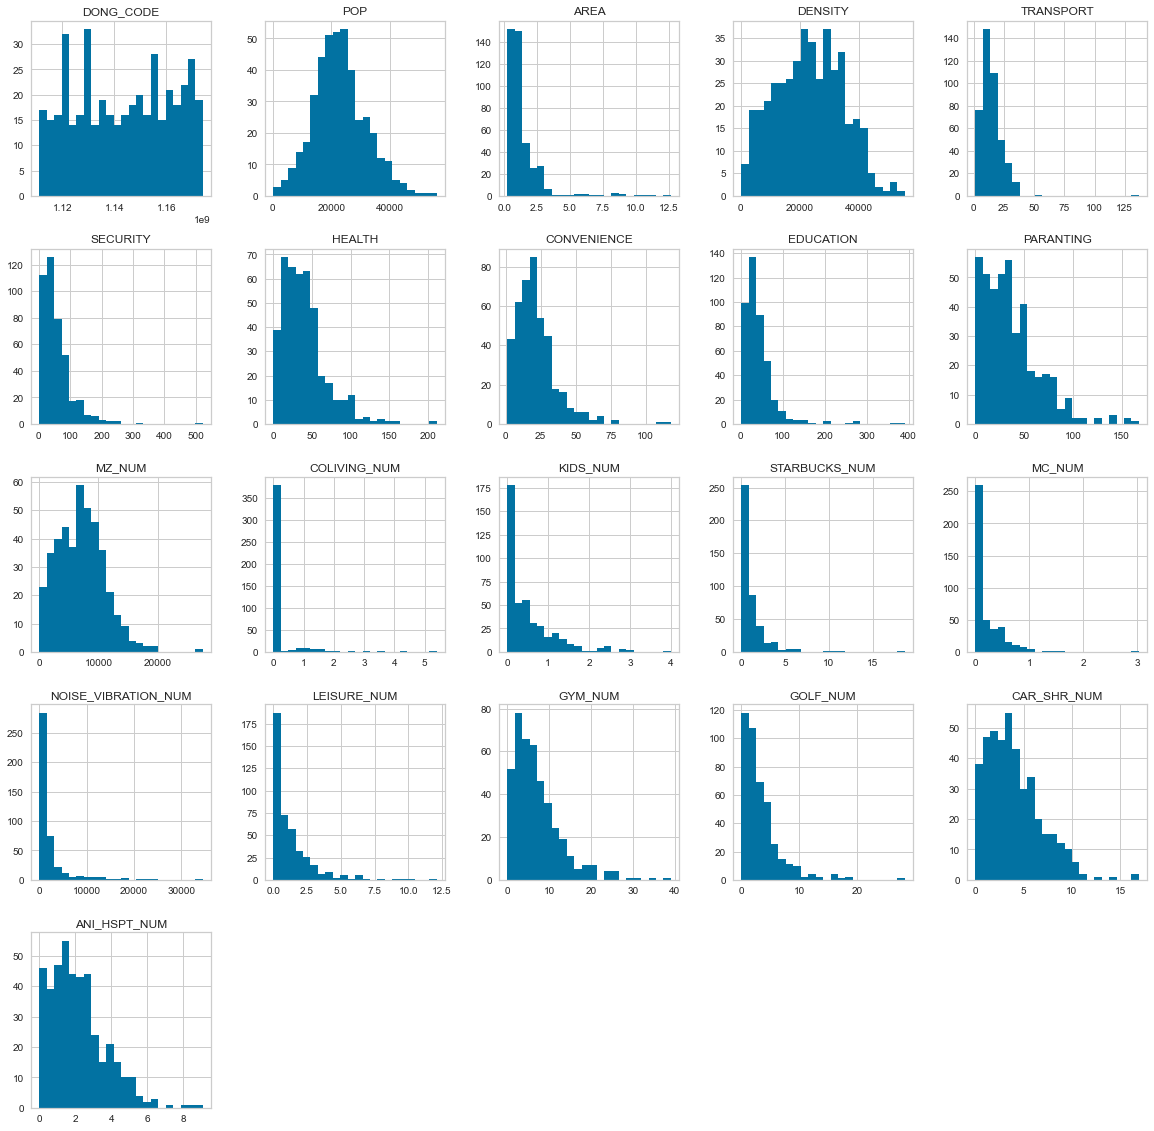

In [127]:
tmp_df.hist(figsize = (20, 20), bins = 22, legend = False)

In [128]:
origin_df = tmp_df.copy()

**소음**

In [129]:
noise = tmp_df['NOISE_VIBRATION_NUM']
noise

0       7321.400778
1      18575.609756
2       9471.140940
3       2664.317181
4        454.565953
           ...     
421     2152.736318
422     2031.455399
423     1994.009217
424     2351.630435
425     2207.653061
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [130]:
for i in range(len(noise)):
    if (noise[i] < 500):
        noise[i] = 4
    elif (noise[i] >= 500 and noise[i] < 1000):
        noise[i] = 3
    elif (noise[i] >= 1000 and noise[i] < 1500):
        noise[i] = 2
    else:
        noise[i] = 1
noise

0      1.0
1      1.0
2      1.0
3      1.0
4      4.0
      ... 
421    1.0
422    1.0
423    1.0
424    1.0
425    1.0
Name: NOISE_VIBRATION_NUM, Length: 426, dtype: float64

In [131]:
noise.value_counts()

1.0    147
4.0    124
3.0     99
2.0     56
Name: NOISE_VIBRATION_NUM, dtype: int64

In [132]:
tmp_df['NOISE_VIBRATION_NUM'] = noise
tmp_df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,5.328145,23.216602,4.368353,4.543450,5.692607,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,13.750678,36.314363,57.907859,28.054201,12.276423,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,7.818792,15.436242,4.496644,9.315436,1.006711,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,3.819383,18.942731,1.682819,4.854626,9.030837,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,3.926719,2.480271,1.517475,1.312289,2.213078,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,16.303483,79.601990,84.378109,44.522388,67.995025,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,12.765258,75.117371,79.624413,42.014085,64.164319,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,12.709677,55.299539,52.949309,23.663594,34.778802,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,4.945652,36.413043,15.467391,12.885870,31.016304,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


#### 1.4.3 최댓값 제한
- 교통
- 보안
- 교육
- 스타벅스
- 맥도날드

**교통**

<AxesSubplot:>

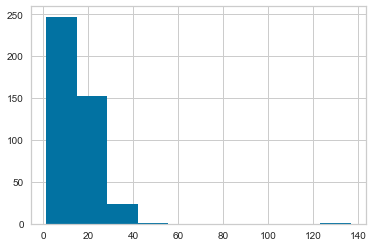

In [133]:
tmp_df['TRANSPORT'].hist()

In [134]:
tmp_df['TRANSPORT'].describe()

count    426.000000
mean      14.899219
std        9.722790
min        1.402529
25%        9.331860
50%       13.183811
75%       18.691749
max      136.688552
Name: TRANSPORT, dtype: float64

In [136]:
t = tmp_df['TRANSPORT'].quantile(0.95)
t

29.322401908801698

In [137]:
tmp_df['TRANSPORT'] = np.where(tmp_df['TRANSPORT'] > t, t, tmp_df['TRANSPORT'])

<AxesSubplot:>

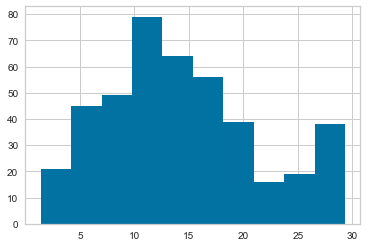

In [138]:
tmp_df['TRANSPORT'].hist()

In [139]:
tmp_df['TRANSPORT']

0       5.328145
1      13.750678
2       7.818792
3       3.819383
4       3.926719
         ...    
421    16.303483
422    12.765258
423    12.709677
424     4.945652
425    19.826531
Name: TRANSPORT, Length: 426, dtype: float64

In [140]:
tmp_df['TRANSPORT'] = np.log1p(tmp_df['TRANSPORT'])

<AxesSubplot:>

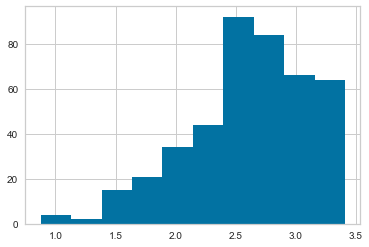

In [141]:
tmp_df['TRANSPORT'].hist()

**보안**

<AxesSubplot:>

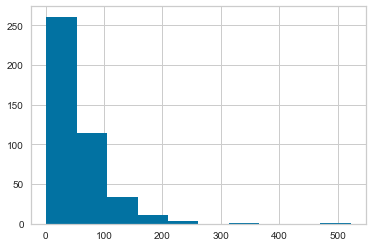

In [142]:
tmp_df['SECURITY'].hist()

In [143]:
tmp_df['SECURITY'].describe()

count    426.000000
mean      56.413573
std       50.615331
min        1.104101
25%       23.515357
50%       43.993671
75%       73.260354
max      522.500000
Name: SECURITY, dtype: float64

In [144]:
s = tmp_df['SECURITY'].quantile(0.95)
s

143.22741982936157

In [145]:
tmp_df['SECURITY'] = np.where(tmp_df['SECURITY'] > s, s, tmp_df['SECURITY'])

<AxesSubplot:>

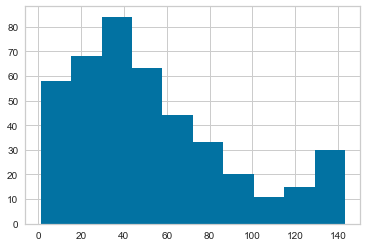

In [146]:
tmp_df['SECURITY'].hist()

In [147]:
tmp_df['SECURITY'] = np.log1p(tmp_df['SECURITY'])

<AxesSubplot:>

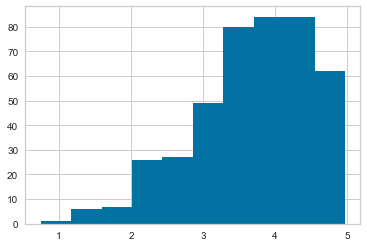

In [148]:
tmp_df['SECURITY'].hist()

**건강**

<AxesSubplot:>

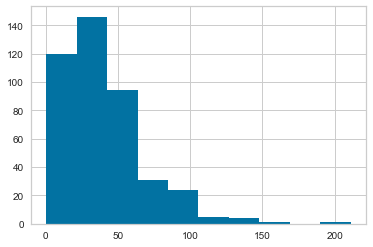

In [149]:
tmp_df['HEALTH'].hist()

In [150]:
h = tmp_df['HEALTH'].quantile(0.95)
h

96.691258111031

In [151]:
tmp_df['HEALTH'] = np.where(tmp_df['HEALTH'] > h, h, tmp_df['HEALTH'])

<AxesSubplot:>

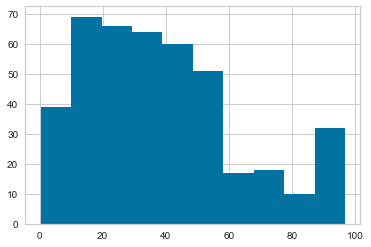

In [152]:
tmp_df['HEALTH'].hist()

In [153]:
tmp_df['HEALTH'] = np.log1p(tmp_df['HEALTH'])

<AxesSubplot:>

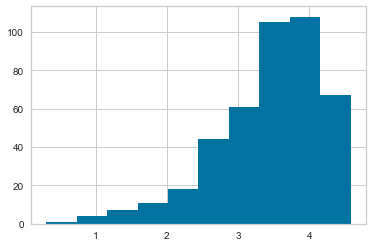

In [154]:
tmp_df['HEALTH'].hist()

**교육**

<AxesSubplot:>

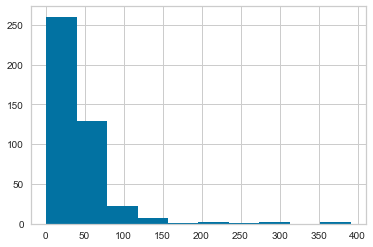

In [201]:
tmp_df['EDUCATION'].hist()

In [202]:
e = tmp_df['EDUCATION'].quantile(0.95)
e

105.6954219807904

In [203]:
tmp_df['EDUCATION'] = np.where(tmp_df['EDUCATION'] > e, e, tmp_df['EDUCATION'])

<AxesSubplot:>

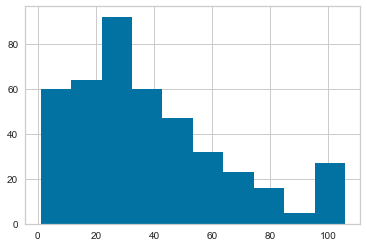

In [204]:
tmp_df['EDUCATION'].hist()

In [205]:
tmp_df['EDUCATION'] = np.log1p(tmp_df['EDUCATION'])

<AxesSubplot:>

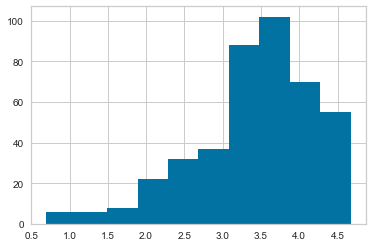

In [206]:
tmp_df['EDUCATION'].hist()

**RobustScaling**

In [207]:
df = tmp_df.copy()
df

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,4.543450,1.901003,2.853437,1249.027237,0.000000,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,28.054201,2.585990,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,9.315436,0.696497,7.382550,459.060403,0.000000,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,4.854626,2.305664,2.202643,1138.766520,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,1.312289,1.167229,1.127396,518.263811,0.000000,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100
422,강동구,성내3동,1174066000,23346,0.71,32882,2.622148,4.332277,4.389801,42.014085,4.176912,29.107981,10028.169014,0.000000,0.938967,1.877934,0.000000,1.0,2.347418,14.084507,6.572770,9.389671,3.755869
423,강동구,길동,1174068500,45973,2.17,21186,2.618102,4.030686,3.988045,23.663594,3.577356,13.824885,6675.576037,0.000000,0.460829,0.921659,0.000000,1.0,1.382488,8.294931,4.147465,4.608295,3.686636
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,12.885870,3.466245,0.000000,35.869565,0.000000,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


In [208]:
col = df.columns[6:]
data = df[col]

In [209]:
scaler = RobustScaler()
scaler.fit(data)
df_scaled = scaler.transform(data)
df_scaled

array([[-1.25137342e+00, -5.58933328e-01, -1.99521548e+00, ...,
        -7.92078690e-01, -8.78911985e-01, -5.83146567e-01],
       [ 6.07593592e-02, -1.68851561e-01,  5.04894589e-01, ...,
        -1.48886972e-03,  1.36328557e-01, -5.65065462e-01],
       [-7.36807703e-01, -9.08602792e-01, -1.97056702e+00, ...,
        -7.92078690e-01, -8.01017731e-01, -9.87505816e-01],
       ...,
       [-5.27148102e-02,  2.02254048e-01,  4.13123334e-01, ...,
         5.52288331e-01,  2.86367576e-01,  9.28076249e-01],
       [-1.34804038e+00, -1.66468631e-01, -8.25384361e-01, ...,
         2.64905526e-01, -3.85973689e-01, -1.40329237e-01],
       [ 5.95575683e-01, -2.21900826e-01, -8.87198270e-01, ...,
         2.00192207e-01, -4.22733088e-01, -1.92197191e-01]])

In [210]:
df[col] = df_scaled
data = df[col]

In [159]:
data

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,-1.251373,-0.558933,-1.995215,-0.944897,-0.815577,-0.803218,-1.093461,0.000000,-0.439314,-0.440172,0.000000,-0.666667,-0.203745,-0.906523,-0.792079,-0.878912,-0.583147
1,0.060759,-0.168852,0.504895,0.548133,-0.613959,-0.415289,-0.907741,0.813008,-0.439314,4.506663,0.000000,-0.666667,0.049270,1.341133,-0.001489,0.136329,-0.565065
2,-0.736808,-0.908603,-1.970567,-0.641856,-0.959074,-0.674763,-1.242268,0.000000,-0.439314,0.019061,0.000000,-0.666667,-0.435990,-0.597282,-0.792079,-0.801018,-0.987506
3,-1.673661,-0.734128,-2.719174,-0.925136,-0.713349,-0.821676,-1.114231,0.000000,-0.439314,-0.550181,0.000000,-0.666667,-0.435990,-0.771202,-0.506491,-0.378039,-0.300808
4,-1.639508,-2.309248,-2.785565,-1.150089,-0.922131,-0.852172,-1.231116,0.000000,-0.439314,-0.454558,0.000000,0.333333,-0.435990,-0.819945,-0.609361,-0.986377,-0.987506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.308243,0.526017,0.892224,1.593932,1.092322,-0.009298,0.957008,0.000000,0.895012,1.137721,0.000000,-0.666667,1.048760,1.385863,1.465626,1.761738,1.080560
422,-0.046442,0.474366,0.832433,1.434644,0.975014,-0.058585,0.560270,0.000000,0.819839,1.042628,0.000000,-0.666667,0.965113,1.256714,1.338431,1.606915,0.964050
423,-0.052715,0.202254,0.413123,0.269312,0.075135,-0.492045,-0.071260,0.000000,0.178657,0.231543,0.000000,-0.666667,0.389176,0.367494,0.552288,0.286368,0.928076
424,-1.348040,-0.166469,-0.825384,-0.415119,-0.040084,-0.884147,-1.321984,0.000000,-0.439314,-0.550181,1.717391,-0.666667,-0.435990,-0.238741,0.264906,-0.385974,-0.140329


## 2. K-means 군집화

### 2.1 1차 k-means clustering

#### 2.1.1 Elbow 관측

In [211]:
# 차원 축소 및 변환
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(data)

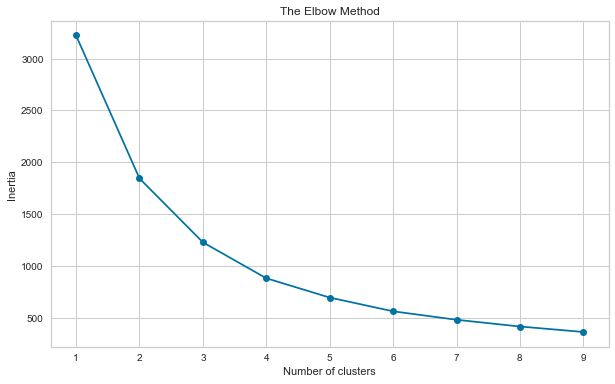

In [212]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### 2.1.2 k-means, n_cluster = 3

In [213]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(pca_transformed)

KMeans(n_clusters=3, random_state=0)

In [214]:
kmeans.labels_
df = tmp_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
km_cluster,,,,,,,,,,,,,,,,,,,,,,,
0,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236
1,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62
2,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128


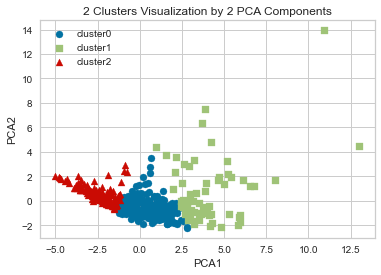

In [215]:
df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df[df['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>','<']
for i in range(marker_n):
    plt.scatter(x = df.loc[markers[i], 'pca_x'], y = df.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('2 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [217]:
df[df['pca_x'] > 10] # 편의, 스타벅스 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,111.616162,2.770377,44.444444,1235.353535,3.030303,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,1,10.930382,13.940203
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,118.065217,4.669978,32.173913,8150.434783,0.000000,0.869565,10.434783,0.869565,1.0,4.782609,39.130435,28.260870,16.521739,6.521739,1,13.017143,4.463297


In [218]:
df[df['pca_x'] > 7.5]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,111.616162,2.770377,44.444444,1235.353535,3.030303,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,1,10.930382,13.940203
343,서초구,서초4동,1165053100,31089,0.88,35328,3.411887,3.892052,4.581812,57.375000,4.669978,82.670455,7989.772727,0.000000,1.136364,5.965909,0.852273,2.0,2.840909,34.090909,19.034091,10.511364,3.409091,1,8.005136,1.672523
369,강남구,역삼2동,1168065000,36378,1.15,31633,2.738875,4.971391,4.581812,118.065217,4.669978,32.173913,8150.434783,0.000000,0.869565,10.434783,0.869565,1.0,4.782609,39.130435,28.260870,16.521739,6.521739,1,13.017143,4.463297


In [219]:
df[df['pca_x'] > 5]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,km_cluster,pca_x,pca_y
19,중구,명동,1114055000,3742,0.99,3780,3.411887,4.842276,4.581812,111.616162,2.770377,44.444444,1235.353535,3.030303,0.000000,18.686869,3.030303,1.0,1.010101,18.181818,3.030303,7.070707,0.000000,1,10.930382,13.940203
30,중구,황학동,1114067000,13444,0.33,40739,2.895410,4.971391,4.224398,42.151515,1.996554,81.818182,16354.545455,0.000000,3.030303,3.030303,0.000000,1.0,12.121212,18.181818,9.090909,6.060606,9.090909,1,5.817617,-1.952288
214,마포구,서교동,1144066000,26549,1.65,16090,3.316937,4.356320,4.581812,67.621212,4.535333,10.606061,7865.454545,1.818182,0.606061,5.151515,0.606061,1.0,9.090909,23.939394,2.424242,14.545455,5.757576,1,6.534400,1.258815
224,양천구,목3동,1147053000,21977,0.53,41466,2.941455,4.227522,4.581812,40.713208,4.669978,97.358491,13743.396226,0.000000,1.886792,3.773585,0.377358,4.0,3.018868,24.905660,9.433962,9.811321,7.924528,1,5.923607,-1.160496
225,양천구,목4동,1147054000,25544,0.57,44814,2.775873,4.155863,4.579690,37.856140,4.669978,90.526316,11977.192982,0.000000,1.754386,3.508772,0.350877,4.0,2.807018,23.157895,8.771930,9.122807,7.368421,1,5.274011,-1.027845
264,구로구,구로4동,1153055000,23745,0.46,51620,3.411887,4.971391,4.581812,63.595652,4.103003,154.782609,14132.608696,0.000000,0.869565,2.608696,0.434783,3.0,4.347826,16.956522,8.695652,16.956522,3.043478,1,5.864251,-1.328099
287,영등포구,영등포동,1156053500,29901,1.26,23731,2.842044,4.885444,4.524975,65.218254,3.803040,103.968254,12286.507937,0.793651,2.777778,6.349206,0.793651,1.0,9.523810,11.111111,3.174603,8.730159,4.365079,1,6.753326,1.249328
320,관악구,청림동,1162054500,15214,0.30,50713,3.079869,4.828906,4.581812,70.011111,4.640788,125.555556,14490.000000,0.000000,1.111111,2.592593,0.000000,3.0,1.851852,26.296296,9.629630,12.962963,5.555556,1,5.965049,-1.733442
341,서초구,서초2동,1165052000,26595,1.24,21448,3.221292,3.557420,4.581812,40.717742,4.337159,58.669355,6994.354839,1.612903,0.806452,4.233871,0.604839,3.0,2.016129,24.193548,13.508065,7.459677,2.419355,1,5.017532,1.370658
343,서초구,서초4동,1165053100,31089,0.88,35328,3.411887,3.892052,4.581812,57.375000,4.669978,82.670455,7989.772727,0.000000,1.136364,5.965909,0.852273,2.0,2.840909,34.090909,19.034091,10.511364,3.409091,1,8.005136,1.672523


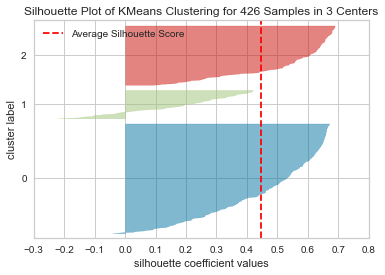

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 426 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [220]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed)      
visualizer.show()

In [221]:
score = silhouette_score(data,df['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.200


#### 2.1.3 각 군집 별 데이터 확인

**km_cluster == 0**

In [222]:
df_cluster_0 = df[df['km_cluster'] == 0][col]

In [223]:
df_cluster_0.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2.754078,3.915432,3.698384,22.214676,3.712018,44.450546,8494.137293,0.128407,0.536467,0.873722,0.194488,2.546610,1.313396,7.320066,3.322022,4.273122,2.446650
std,0.383111,0.614319,0.354693,7.614781,0.463395,26.523433,3160.228076,0.427798,0.550535,0.719532,0.263227,1.196604,1.319335,3.377126,2.061835,1.927109,1.187653
min,1.825294,2.055744,2.782454,8.518519,2.334526,1.111111,402.970297,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.479137,3.546351,3.472870,17.029670,3.407645,27.642587,6476.606754,0.000000,0.000000,0.426445,0.000000,1.000000,0.000000,4.786367,1.797780,2.992574,1.576279
50%,2.768437,3.923398,3.701506,21.054846,3.705087,40.209031,8189.071618,0.000000,0.439078,0.695654,0.000000,3.000000,1.081113,6.944444,3.151274,3.934469,2.359969
75%,3.024182,4.316744,3.946309,26.685357,4.021557,55.629663,10068.571429,0.000000,0.794706,1.167904,0.351810,4.000000,1.859281,9.284870,4.375000,5.439723,3.132038
max,3.411887,4.971391,4.581812,57.468750,4.669978,167.705167,27574.074074,3.125000,2.531646,4.201681,1.449275,4.000000,6.567164,20.000000,11.764706,10.714286,5.882353


**km_cluster == 1**

In [224]:
df_cluster_1 = df[df['km_cluster'] == 1][col]

In [225]:
df_cluster_1.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2.894463,4.314235,4.321208,45.769976,3.866354,53.201894,9114.398619,0.539871,1.040476,3.923257,0.396535,1.693548,2.692506,16.122192,7.842564,8.111181,3.686902
std,0.425065,0.576250,0.314996,18.020143,0.948435,34.373407,4669.651828,1.110345,0.967871,2.982599,0.504495,1.049414,2.803785,7.590749,5.523674,3.032074,2.064841
min,1.563501,2.353640,2.862933,22.914286,0.773190,6.122449,1008.510638,0.000000,0.000000,1.282051,0.000000,1.000000,0.000000,1.351351,0.000000,0.000000,0.000000
25%,2.659706,3.911991,4.173657,33.659969,3.540724,28.875097,5644.304267,0.000000,0.075758,2.130780,0.000000,1.000000,0.803252,11.212121,3.529603,6.375357,2.447428
50%,2.875440,4.394663,4.405683,40.947581,4.190211,46.250000,9215.671233,0.000000,0.904266,2.872907,0.331489,1.000000,1.742351,15.582011,7.539683,8.124186,3.851618
75%,3.295679,4.816812,4.581812,52.663158,4.620988,78.862339,12375.793651,0.803251,1.379505,4.932432,0.585904,2.000000,3.148496,20.136694,9.880891,9.727586,4.836310
max,3.411887,4.971391,4.581812,118.065217,4.669978,154.782609,19633.333333,5.405405,4.000000,18.686869,3.030303,4.000000,12.121212,39.130435,28.260870,16.956522,9.090909


**km_cluster == 2**

In [226]:
df_cluster_2 = df[df['km_cluster'] == 2][col]

In [227]:
df_cluster_2.describe()

,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.227638,3.026060,2.584629,9.115237,2.669700,15.402693,3584.790990,0.055652,0.165760,0.347632,0.075979,2.703125,0.345456,2.447190,1.208494,1.679005,0.868565
std,0.540331,0.840202,0.672637,5.537403,0.712911,13.364940,2121.268689,0.348312,0.266632,0.524112,0.167395,1.250886,0.485736,1.632672,0.975427,1.229217,0.589627
min,0.876522,0.743888,0.305382,1.037855,0.696497,0.000000,35.869565,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.804108,2.421439,2.237491,5.513791,2.224739,5.610446,1967.025162,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.193348,0.480337,0.779736,0.427559
50%,2.310551,3.004072,2.695035,8.053477,2.738378,12.558409,3279.767630,0.000000,0.000000,0.202440,0.000000,3.000000,0.163765,2.161073,1.076428,1.398966,0.805865
75%,2.594330,3.635207,3.017725,11.483728,3.220400,20.492146,4621.744966,0.000000,0.253969,0.384976,0.072874,4.000000,0.552035,3.301957,1.746246,2.267269,1.234053
max,3.411887,4.971391,4.581812,33.263158,4.047042,88.333333,12045.833333,3.508772,1.379310,3.703704,1.075269,4.000000,2.500000,8.637874,5.263158,5.633803,2.816901


### 2.2 2차 k-means_clustering

#### 2.2.1 km_cluster == 0

- Elbow 관측

In [228]:
df_0 = df[df['km_cluster'] == 0][tmp_df.columns]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
11,종로구,혜화동,1111065000,18960,1.12,16929,2.290006,4.205758,3.203762,22.415179,3.339828,25.000000,7728.571429,0.0,0.000000,1.785714,0.892857,1.0,2.678571,4.464286,0.000000,1.785714,0.892857
13,종로구,창신2동,1111068000,9051,0.26,34812,2.427748,3.980879,4.132496,21.512821,2.851892,37.179487,10569.230769,0.0,0.000000,0.000000,1.282051,1.0,0.000000,3.846154,1.282051,0.000000,1.282051
14,종로구,창신3동,1111069000,6733,0.23,29274,2.816883,4.101325,4.253246,24.318841,2.967810,42.028986,8382.608696,0.0,0.000000,0.000000,1.449275,1.0,0.000000,4.347826,1.449275,0.000000,1.449275
16,종로구,숭인2동,1111071000,10175,0.35,29071,3.002850,3.986335,3.668677,21.128571,2.833213,44.285714,11994.285714,0.0,0.000000,1.428571,0.000000,1.0,4.285714,7.142857,2.857143,5.714286,2.857143
25,중구,다산동,1114062500,14274,0.51,27988,2.163999,4.677825,3.737825,28.254902,3.265610,47.385621,9260.784314,0.0,0.326797,0.326797,0.000000,4.0,0.000000,6.535948,0.653595,4.248366,2.941176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,19.206186,4.669978,14.948454,4338.144330,0.0,1.546392,1.546392,0.000000,1.0,1.546392,8.762887,6.185567,5.670103,2.061856
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,15.738562,3.868815,13.398693,9568.627451,0.0,1.307190,0.326797,0.000000,2.0,0.326797,5.228758,2.614379,1.307190,1.633987
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,20.125265,3.027289,17.409766,7136.942675,0.0,1.273885,0.849257,0.212314,3.0,2.760085,2.972399,1.486200,3.609342,0.849257
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,39.995781,3.689723,34.599156,12037.974684,0.0,2.531646,1.687764,0.421941,1.0,5.485232,5.907173,2.953586,7.172996,1.687764


In [229]:
col_0 = df_0.columns[6:]
data_0 = df_0[col_0].values

In [230]:
pca_transformed_0 = pca.fit_transform(data_0)
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]
df_0

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
11,종로구,혜화동,1111065000,18960,1.12,16929,2.290006,4.205758,3.203762,22.415179,3.339828,25.000000,7728.571429,0.0,0.000000,1.785714,0.892857,1.0,2.678571,4.464286,0.000000,1.785714,0.892857,-765.582854,-18.833582
13,종로구,창신2동,1111068000,9051,0.26,34812,2.427748,3.980879,4.132496,21.512821,2.851892,37.179487,10569.230769,0.0,0.000000,0.000000,1.282051,1.0,0.000000,3.846154,1.282051,0.000000,1.282051,2075.083732,-9.257670
14,종로구,창신3동,1111069000,6733,0.23,29274,2.816883,4.101325,4.253246,24.318841,2.967810,42.028986,8382.608696,0.0,0.000000,0.000000,1.449275,1.0,0.000000,4.347826,1.449275,0.000000,1.449275,-111.530383,-2.288998
16,종로구,숭인2동,1111071000,10175,0.35,29071,3.002850,3.986335,3.668677,21.128571,2.833213,44.285714,11994.285714,0.0,0.000000,1.428571,0.000000,1.0,4.285714,7.142857,2.857143,5.714286,2.857143,3500.145301,-3.381573
25,중구,다산동,1114062500,14274,0.51,27988,2.163999,4.677825,3.737825,28.254902,3.265610,47.385621,9260.784314,0.0,0.326797,0.326797,0.000000,4.0,0.000000,6.535948,0.653595,4.248366,2.941176,766.653683,2.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,강동구,명일2동,1174054000,17568,0.97,18111,2.634629,3.447202,4.277239,19.206186,4.669978,14.948454,4338.144330,0.0,1.546392,1.546392,0.000000,1.0,1.546392,8.762887,6.185567,5.670103,2.061856,-4156.017372,-25.815632
414,강동구,암사1동,1174057000,34782,1.02,34100,2.178902,3.809273,3.369997,15.738562,3.868815,13.398693,9568.627451,0.0,1.307190,0.326797,0.000000,2.0,0.326797,5.228758,2.614379,1.307190,1.633987,1074.456794,-32.357512
418,강동구,천호2동,1174061000,33753,1.57,21499,2.314614,4.058721,3.712743,20.125265,3.027289,17.409766,7136.942675,0.0,1.273885,0.849257,0.212314,3.0,2.760085,2.972399,1.486200,3.609342,0.849257,-1357.219456,-25.997507
419,강동구,천호3동,1174062000,27000,0.79,34177,1.995303,4.736901,4.387340,39.995781,3.689723,34.599156,12037.974684,0.0,2.531646,1.687764,0.421941,1.0,5.485232,5.907173,2.953586,7.172996,1.687764,3543.840186,-12.143938


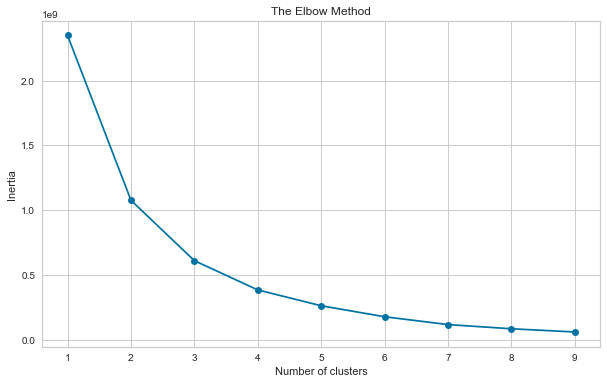

In [231]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_0)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [232]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_0 = kmeans.fit(pca_transformed_0)
# Getting unique labels
u_labels = np.unique(label_0)

In [233]:
df_0['km_cluster'] = kmeans.labels_
df_0.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
1,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
2,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


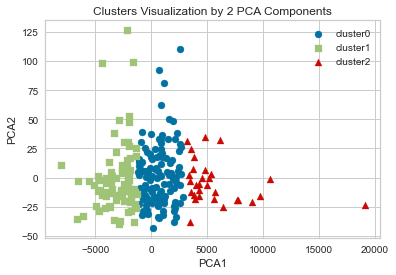

In [234]:
df_0['pca_x'] = pca_transformed_0[:,0]
df_0['pca_y'] = pca_transformed_0[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_0['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_0[df_0['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_0.loc[markers[i], 'pca_x'], y = df_0.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [235]:
df_0[df_0['pca_x'] > 15000] # MZ 세대 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
333,관악구,신림동,1162069500,23128,0.54,42830,3.411887,4.389866,3.976183,37.099327,3.67877,37.037037,27574.074074,0.0,0.3367,0.673401,0.16835,4.0,2.020202,11.111111,2.356902,6.734007,2.188552,19079.929694,-23.762738,2


In [237]:
df_0[df_0['pca_x'] > 10000] # 골프, 헬스장이 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
322,관악구,행운동,1162057500,29413,0.72,40851,2.266766,3.964569,3.997067,29.171296,3.778738,52.314815,19100.000000,0.0,0.462963,1.080247,0.00000,4.0,0.771605,10.956790,4.012346,5.401235,2.314815,10605.868201,-1.278860,2
333,관악구,신림동,1162069500,23128,0.54,42830,3.411887,4.389866,3.976183,37.099327,3.678770,37.037037,27574.074074,0.0,0.336700,0.673401,0.16835,4.0,2.020202,11.111111,2.356902,6.734007,2.188552,19079.929694,-23.762738,2


In [236]:
df_0[df_0['pca_x'] > 7500]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
244,강서구,화곡1동,1150054000,52770,1.12,47116,2.510978,3.621241,3.574926,17.974330,3.376566,37.388393,18240.178571,0.0,0.558036,0.669643,0.111607,4.0,2.566964,6.250000,1.785714,4.241071,2.008929,9746.025030,-16.091511,2
322,관악구,행운동,1162057500,29413,0.72,40851,2.266766,3.964569,3.997067,29.171296,3.778738,52.314815,19100.000000,0.0,0.462963,1.080247,0.000000,4.0,0.771605,10.956790,4.012346,5.401235,2.314815,10605.868201,-1.278860,2
324,관악구,청룡동,1162059500,36482,1.18,30917,2.060909,3.482601,3.514717,17.799435,3.299214,31.920904,16142.372881,0.0,0.282486,0.659134,0.000000,4.0,0.470810,6.685499,2.448211,3.295669,1.412429,7648.215749,-19.663989,2
329,관악구,서원동,1162064500,23278,0.65,35812,2.848643,4.206986,3.794593,30.820979,3.498498,30.769231,17472.307692,0.0,0.279720,0.559441,0.139860,4.0,1.678322,9.230769,1.958042,5.594406,1.818182,8978.159645,-21.291262,2
332,관악구,신사동,1162068500,24838,0.64,38809,3.016746,4.222261,3.809751,31.302557,3.513536,31.250000,16246.875000,0.0,0.284091,0.568182,0.142045,4.0,1.704545,9.375000,1.988636,5.681818,1.846591,7752.728648,-19.679581,2
333,관악구,신림동,1162069500,23128,0.54,42830,3.411887,4.389866,3.976183,37.099327,3.678770,37.037037,27574.074074,0.0,0.336700,0.673401,0.168350,4.0,2.020202,11.111111,2.356902,6.734007,2.188552,19079.929694,-23.762738,2


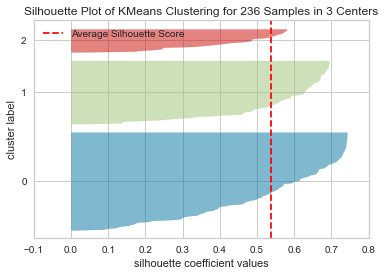

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 236 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [238]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_transformed_0)      
visualizer.show()

In [239]:
score = silhouette_score(data_0,df_0['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.536


#### 2.2.2 km_cluster == 1

- Elbow 관측

In [240]:
df_1 = df[df['km_cluster'] == 1][tmp_df.columns]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,28.054201,2.585990,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,22.914286,3.727413,102.857143,8122.857143,0.000000,2.857143,11.428571,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,38.234752,3.489390,29.929078,1008.510638,1.276596,0.425532,5.673759,0.425532,1.0,1.702128,4.255319,2.127660,7.659574,0.000000
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,23.423077,2.358675,6.410256,4100.000000,0.000000,0.000000,5.128205,1.282051,1.0,0.000000,3.846154,1.282051,8.974359,0.000000
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,32.152174,3.232693,67.391304,7308.695652,4.347826,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,강동구,명일1동,1174053000,25941,0.61,42526,2.919099,3.899154,4.581812,30.540984,4.669978,23.770492,11513.114754,0.000000,2.459016,2.459016,0.000000,1.0,2.459016,13.934426,9.836066,9.016393,3.278689
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,44.502347,3.793958,38.497653,10816.901408,0.000000,2.816901,1.877934,0.469484,1.0,6.103286,6.572770,3.286385,7.981221,1.877934
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,51.431034,4.376335,35.632184,10234.482759,0.000000,1.149425,2.298851,0.000000,1.0,2.873563,17.241379,8.045977,11.494253,4.597701
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100


In [241]:
col_1 = df_1.columns[6:]
data_1 = df_1[col_1].values

In [242]:
pca_transformed_1 = pca.fit_transform(data_1)
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]
df_1

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
1,종로구,사직동,1111053000,9636,1.23,7834,2.691289,3.619378,4.075975,28.054201,2.585990,16.531165,2234.959350,0.813008,0.000000,5.962060,0.000000,1.0,0.813008,14.634146,2.439024,4.065041,0.813008,-6879.520214,-11.628795
6,종로구,교남동,1111058000,10203,0.35,29151,3.411887,3.386809,4.054018,22.914286,3.727413,102.857143,8122.857143,0.000000,2.857143,11.428571,0.000000,1.0,0.000000,5.714286,0.000000,0.000000,2.857143,-991.337702,52.049066
8,종로구,종로1.2.3.4가동,1111061500,8595,2.35,3657,3.116128,3.623111,4.165884,38.234752,3.489390,29.929078,1008.510638,1.276596,0.425532,5.673759,0.425532,1.0,1.702128,4.255319,2.127660,7.659574,0.000000,-8105.916768,7.524114
10,종로구,이화동,1111064000,7705,0.78,9878,2.748257,3.880241,2.862933,23.423077,2.358675,6.410256,4100.000000,0.000000,0.000000,5.128205,1.282051,1.0,0.000000,3.846154,1.282051,8.974359,0.000000,-5014.534105,-28.645058
15,종로구,숭인1동,1111070000,6106,0.23,26548,3.411887,4.399802,4.079746,32.152174,3.232693,67.391304,7308.695652,4.347826,0.000000,2.173913,0.000000,1.0,6.521739,10.869565,4.347826,8.695652,4.347826,-1805.627446,20.199750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,강동구,명일1동,1174053000,25941,0.61,42526,2.919099,3.899154,4.581812,30.540984,4.669978,23.770492,11513.114754,0.000000,2.459016,2.459016,0.000000,1.0,2.459016,13.934426,9.836066,9.016393,3.278689,2398.592256,-39.531738
417,강동구,천호1동,1174060000,26973,0.71,37990,2.682371,4.842781,4.492848,44.502347,3.793958,38.497653,10816.901408,0.000000,2.816901,1.877934,0.469484,1.0,6.103286,6.572770,3.286385,7.981221,1.877934,1702.430727,-20.796984
420,강동구,성내1동,1174064000,20045,0.58,34560,2.323627,4.532105,4.581812,51.431034,4.376335,35.632184,10234.482759,0.000000,1.149425,2.298851,0.000000,1.0,2.873563,17.241379,8.045977,11.494253,4.597701,1120.006193,-21.318099
421,강동구,성내2동,1174065000,24106,0.67,35979,2.850908,4.389523,4.447090,44.522388,4.234034,30.845771,12134.328358,0.000000,0.995025,1.990050,0.000000,1.0,2.487562,14.925373,6.965174,9.950249,3.980100,3019.821064,-33.718632


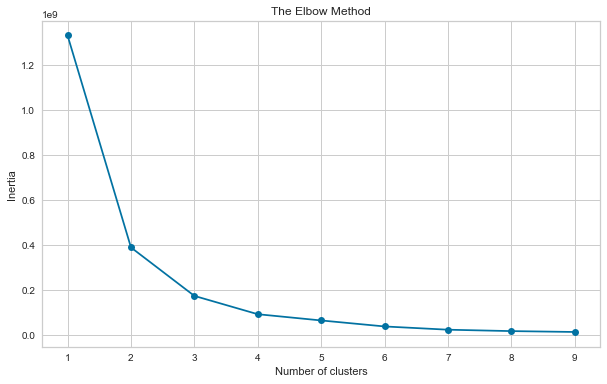

In [243]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_1)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [244]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_1 = kmeans.fit(pca_transformed_1)
# Getting unique labels
u_labels = np.unique(label_1)

In [245]:
df_1['km_cluster'] = kmeans.labels_
df_1.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


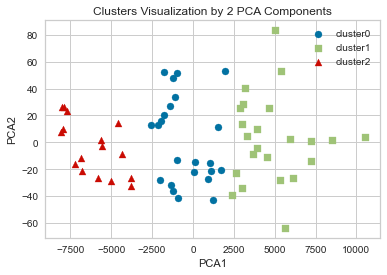

In [246]:
df_1['pca_x'] = pca_transformed_1[:,0]
df_1['pca_y'] = pca_transformed_1[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_1['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_1[df_1['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_1.loc[markers[i], 'pca_x'], y = df_1.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2'])
plt.show()

In [247]:
df_1[df_1['pca_y'] < -60] # 육아시설이 적고 코리빙 시설이 유일하게 있음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
65,광진구,화양동,1121571000,26034,1.16,22443,2.777426,3.593052,3.922997,46.439655,3.023783,10.344828,14741.37931,0.862069,0.862069,2.586207,0.862069,1.0,10.344828,13.793103,3.448276,6.034483,1.724138,5626.771051,-63.850054,1


In [249]:
df_1[df_1['pca_y'] > 80] # 육아시설이 제일 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
264,구로구,구로4동,1153055000,23745,0.46,51620,3.411887,4.971391,4.581812,63.595652,4.103003,154.782609,14132.608696,0.0,0.869565,2.608696,0.434783,3.0,4.347826,16.956522,8.695652,16.956522,3.043478,5018.555452,83.565097,1


In [248]:
df_1[df_1['km_cluster'] == 1]

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
30,중구,황학동,1114067000,13444,0.33,40739,2.895410,4.971391,4.224398,42.151515,1.996554,81.818182,16354.545455,0.000000,3.030303,3.030303,0.000000,1.0,12.121212,18.181818,9.090909,6.060606,9.090909,7240.206585,0.620621,1
49,성동구,왕십리도선동,1120053500,26910,0.72,37375,3.136701,4.283970,4.581812,31.694444,4.124779,71.527778,12405.555556,0.000000,0.000000,2.777778,0.000000,1.0,0.000000,18.055556,4.166667,5.555556,4.861111,3291.210235,4.739016,1
53,성동구,행당2동,1120057000,23376,0.42,55657,3.411887,3.962475,4.262233,32.436508,4.355487,50.000000,15207.142857,0.000000,1.587302,1.587302,0.793651,2.0,2.380952,8.730159,4.761905,5.555556,6.349206,6092.689832,-26.967915,1
65,광진구,화양동,1121571000,26034,1.16,22443,2.777426,3.593052,3.922997,46.439655,3.023783,10.344828,14741.379310,0.862069,0.862069,2.586207,0.862069,1.0,10.344828,13.793103,3.448276,6.034483,1.724138,5626.771051,-63.850054,1
66,광진구,군자동,1121573000,21500,0.74,29054,3.385764,4.187605,3.966204,29.351351,3.505476,64.864865,13013.513514,0.000000,1.351351,2.702703,0.000000,1.0,2.702703,17.567568,4.054054,4.054054,2.702703,3899.138800,-4.417052,1
73,광진구,자양1동,1121582000,23134,0.57,40586,2.996609,4.271291,4.240064,40.109649,4.256110,45.614035,14417.543860,0.000000,2.192982,2.192982,0.438596,3.0,3.070175,17.543860,9.210526,10.526316,3.947368,5303.079710,-28.114161,1
77,광진구,구의1동,1121585000,22139,0.56,39534,2.784423,4.560621,4.240298,50.142857,4.669978,66.666667,16314.285714,0.000000,0.000000,1.785714,0.000000,2.0,1.785714,24.404762,10.714286,5.357143,2.380952,7199.883453,-13.992615,1
101,중랑구,상봉2동,1126059000,20647,0.65,31765,2.750225,4.493809,3.986988,34.638462,3.309138,60.000000,13661.538462,0.000000,2.307692,2.307692,0.769231,2.0,1.538462,12.307692,2.307692,6.923077,2.307692,4547.135239,-11.024370,1
207,마포구,공덕동,1144056500,37792,1.01,37418,3.065825,4.349021,4.525906,25.155116,4.114357,59.900990,12756.435644,0.000000,0.990099,3.795380,0.000000,1.0,0.000000,12.541254,5.610561,10.396040,4.455446,3642.044718,-8.412140,1
224,양천구,목3동,1147053000,21977,0.53,41466,2.941455,4.227522,4.581812,40.713208,4.669978,97.358491,13743.396226,0.000000,1.886792,3.773585,0.377358,4.0,3.018868,24.905660,9.433962,9.811321,7.924528,4629.139944,25.811130,1


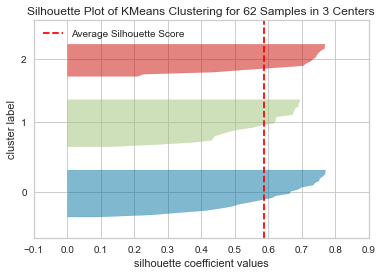

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 62 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [250]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_1)      
visualizer.show()

In [251]:
score = silhouette_score(data_1,df_1['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.587


#### 2.2.3 km_cluster == 2

- Elbow 관측

In [252]:
df_2 = df[df['km_cluster'] == 2][tmp_df.columns]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,4.543450,1.901003,2.853437,1249.027237,0.0,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,9.315436,0.696497,7.382550,459.060403,0.0,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,4.854626,2.305664,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,1.312289,1.167229,1.127396,518.263811,0.0,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,9.388889,3.804190,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,6.059701,3.091947,21.641791,2992.537313,0.0,0.248756,0.248756,0.000000,2.0,0.000000,1.492537,0.248756,0.497512,0.995025
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,13.604520,3.726374,11.581921,3988.135593,0.0,1.129944,0.282486,0.000000,2.0,0.282486,4.519774,2.259887,1.129944,1.412429
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,6.395750,2.998385,5.444887,1699.203187,0.0,0.531208,0.132802,0.000000,3.0,0.132802,2.124834,1.062417,0.531208,0.664011
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,12.885870,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435


In [253]:
col_2 = df_2.columns[6:]
data_2 = df_2[col_2].values

In [254]:
pca_transformed_2 = pca.fit_transform(data_2)
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]
df_2

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
0,종로구,청운효자동,1111051500,12177,2.57,4738,1.845007,3.187038,1.680521,4.543450,1.901003,2.853437,1249.027237,0.0,0.000000,0.129702,0.000000,1.0,0.389105,0.000000,0.000000,0.389105,0.778210,-2335.788022,-8.059592
2,종로구,삼청동,1111054000,2739,1.49,1838,2.176885,2.799489,1.704138,9.315436,0.696497,7.382550,459.060403,0.0,0.000000,0.671141,0.000000,1.0,0.000000,2.013423,0.000000,0.671141,0.000000,-3125.739419,-1.250400
3,종로구,부암동,1111055000,9782,2.27,4309,1.572646,2.992865,0.986868,4.854626,2.305664,2.202643,1138.766520,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.881057,0.881057,2.202643,1.321586,-2446.049383,-8.440712
4,종로구,평창동,1111056000,18329,8.87,2066,1.594673,1.247110,0.923256,1.312289,1.167229,1.127396,518.263811,0.0,0.000000,0.112740,0.000000,4.0,0.000000,0.563698,0.563698,0.000000,0.000000,-3066.556711,-8.671066
5,종로구,무악동,1111057000,8297,0.36,23047,2.668385,3.613916,2.700615,9.388889,3.804190,36.111111,5061.111111,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,2.777778,2.777778,0.000000,1476.359202,17.391100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,강동구,고덕2동,1174056000,22329,2.01,11109,1.881324,3.173275,2.500130,6.059701,3.091947,21.641791,2992.537313,0.0,0.248756,0.248756,0.000000,2.0,0.000000,1.492537,0.248756,0.497512,0.995025,-592.242226,7.053081
415,강동구,암사2동,1174058000,15252,1.18,12925,2.316332,3.667032,3.229665,13.604520,3.726374,11.581921,3988.135593,0.0,1.129944,0.282486,0.000000,2.0,0.282486,4.519774,2.259887,1.129944,1.412429,403.340602,-4.031587
416,강동구,암사3동,1174059000,17947,2.51,7150,1.857501,2.940657,2.518531,6.395750,2.998385,5.444887,1699.203187,0.0,0.531208,0.132802,0.000000,3.0,0.132802,2.124834,1.062417,0.531208,0.664011,-1885.605814,-6.191170
424,강동구,둔촌1동,1174069000,144,0.92,157,1.782660,3.622019,2.801382,12.885870,3.466245,0.000000,35.869565,0.0,0.000000,0.000000,0.543478,1.0,0.000000,4.347826,3.260870,2.173913,1.630435,-3548.939673,-7.159777


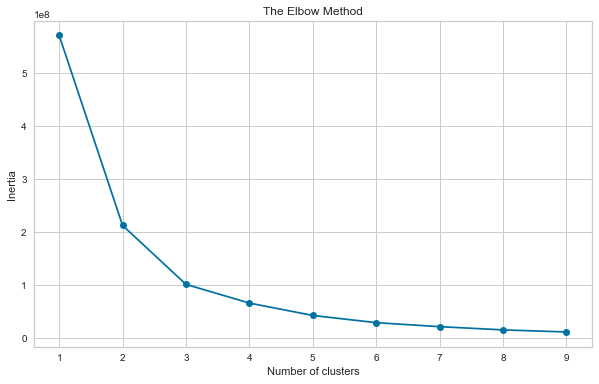

In [255]:
inertia = [] # 군집의 centre 와 sample 사이의 거리의 제곱의 합
plt.figure(figsize=(10,6))
for i in range(1, 10): # 군집 개수에 따른 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(pca_transformed_2)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

- 2차 k-means : n_cluster = 3(Elbow)로 설정

In [256]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
# label
label_2 = kmeans.fit(pca_transformed_2)
# Getting unique labels
u_labels = np.unique(label_2)

In [257]:
df_2['km_cluster'] = kmeans.labels_
df_2.groupby('km_cluster').count()

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
1,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
2,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51


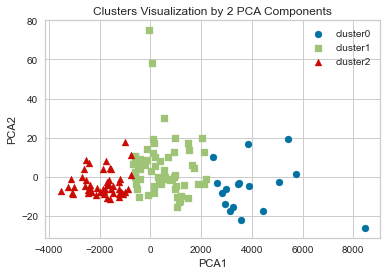

In [258]:
df_2['pca_x'] = pca_transformed_2[:,0]
df_2['pca_y'] = pca_transformed_2[:,1]

# 클러스터별 인덱스 추출
marker_n = len(df_2['km_cluster'].unique())
markers = []
for i in range(marker_n):
    marker = df_2[df_2['km_cluster'] == i].index
    markers.append(marker)

m = ['o','s','^','v','>']
for i in range(marker_n):
    plt.scatter(x = df_2.loc[markers[i], 'pca_x'], y = df_2.loc[markers[i], 'pca_y'], marker = m[i])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1','cluster2','cluster3'])
plt.show()

In [261]:
df_2[df_2['pca_y'] > 40] # 편의시설의 수가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
9,종로구,종로5.6가동,1111063000,5476,0.6,9127,3.099341,4.214594,4.581812,28.533333,2.498700,88.333333,3541.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,-42.958593,74.980585,1
275,구로구,항동,1153080000,16476,1.4,11769,3.040091,2.330756,1.316025,9.457143,2.963061,74.285714,3656.428571,0.0,0.0,0.0,0.0,2.0,0.0,2.857143,0.0,0.0,1.428571,71.757791,58.235907,1


In [266]:
df_2[df_2['km_cluster'] == 1].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,1.143614e+09,23447.300000,1.723333,14575.800000,2.382278,3.106755,2.869042,10.140735,2.959833,21.210247,4086.292940,0.005325,0.177881,0.318496,0.096634,2.816667,0.394192,2.909695,1.307010,1.899793,1.055667,501.513625,4.826154,1.0
std,1.994006e+07,9323.808448,0.844342,3544.330521,0.470827,0.710723,0.537991,4.302587,0.511703,14.863637,820.908710,0.041246,0.278714,0.381322,0.193964,1.142279,0.459390,1.544796,0.860346,1.150793,0.530050,820.906780,15.061578,0.0
min,1.111057e+09,5476.000000,0.310000,7318.000000,0.930052,1.451139,1.316025,4.496226,1.590642,2.666667,2885.492228,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-699.285451,-15.441762,1.0
25%,1.126064e+09,17245.500000,1.100000,12384.750000,2.042946,2.695933,2.621788,7.081600,2.674018,12.727273,3452.034943,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.854547,0.654308,1.126713,0.746054,-132.728608,-4.001535,1.0
50%,1.141066e+09,22414.000000,1.585000,14564.000000,2.461210,3.144124,2.864268,9.423016,3.038874,18.533670,3965.717281,0.000000,0.000000,0.242597,0.000000,3.000000,0.247369,2.734324,1.206213,1.779402,1.001110,380.932168,2.566176,1.0
75%,1.159812e+09,28348.750000,2.262500,17069.500000,2.673083,3.581588,3.193731,12.016122,3.301723,25.326635,4621.744966,0.000000,0.292521,0.356243,0.151290,4.000000,0.642407,3.712121,1.818182,2.539683,1.359534,1036.924066,10.144632,1.0
max,1.174058e+09,49979.000000,4.700000,23047.000000,3.267568,4.383663,4.581812,28.533333,3.829206,88.333333,5772.514620,0.319489,1.379310,2.068966,1.075269,4.000000,1.818182,6.515152,4.225352,5.154639,2.816901,2187.724927,74.980585,1.0


In [263]:
df_2[df_2['pca_x'] > 6000] # MZ 세대가 많음

,GU,DONG,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
114,성북구,돈암2동,1129059000,23913,0.48,49819,3.192703,2.965416,2.232848,2.982639,3.256894,7.986111,12045.833333,0.0,0.347222,0.347222,0.0,3.0,0.0,1.041667,1.736111,1.388889,0.347222,8461.000491,-26.286802,0


In [267]:
df_2[df_2['km_cluster'] == 0].describe()

,DONG_CODE,POP,AREA,DENSITY,TRANSPORT,SECURITY,HEALTH,CONVENIENCE,EDUCATION,PARANTING,MZ_NUM,COLIVING_NUM,KIDS_NUM,STARBUCKS_NUM,MC_NUM,NOISE_VIBRATION_NUM,LEISURE_NUM,GYM_NUM,GOLF_NUM,CAR_SHR_NUM,ANI_HSPT_NUM,pca_x,pca_y,km_cluster
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,1.139564e+09,24466.705882,1.094118,24421.588235,2.794198,3.828451,2.885310,12.135900,3.035917,17.659651,7560.677328,0.068399,0.194130,0.289445,0.096730,1.823529,0.511862,2.891401,1.588854,2.512915,0.913970,3975.884030,-5.861939,0.0
std,1.860106e+07,9744.517149,0.530519,8036.205487,0.339709,0.536141,0.369319,5.907378,0.450783,12.716109,1503.659300,0.282018,0.354588,0.576021,0.219524,1.131111,0.790950,1.719213,1.446778,1.674511,0.785819,1503.657533,12.830190,0.0
min,1.117051e+09,13091.000000,0.400000,12426.000000,2.343916,2.945870,2.214460,2.921769,2.040146,0.000000,6047.976879,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2463.213257,-26.286802,0.0
25%,1.123074e+09,16527.000000,0.710000,20442.000000,2.489703,3.491711,2.704178,10.111111,2.704287,7.823129,6575.362319,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.315789,0.480769,1.388889,0.340136,2990.566905,-15.776064,0.0
50%,1.129081e+09,22991.000000,0.980000,22276.000000,2.941102,3.803539,2.907085,11.849282,3.101711,17.441860,7063.924051,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.657005,1.674641,2.255639,0.952381,3479.136292,-4.777873,0.0
75%,1.156058e+09,31056.000000,1.380000,27119.000000,3.044522,4.187114,3.182850,14.322785,3.331374,23.205742,8006.122449,0.000000,0.340136,0.340136,0.000000,3.000000,0.789474,4.113924,2.105263,3.488372,1.156069,4421.299424,-2.733303,0.0
max,1.174070e+09,46698.000000,2.090000,49819.000000,3.411887,4.971391,3.479700,26.676692,3.836863,46.153846,12045.833333,1.162791,1.156069,2.255639,0.751880,4.000000,2.500000,6.015038,5.263158,5.633803,2.816901,8461.000491,19.472239,0.0


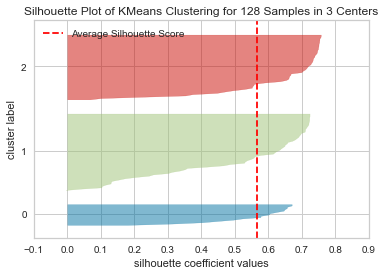

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 128 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [259]:
# visualizer 생성
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# 생성 된 visualizer에 데이터 입력 
visualizer.fit(pca_transformed_2)      
visualizer.show()

In [260]:
score = silhouette_score(data_2,df_2['km_cluster'])
print('Silhouette Score : {0: .3f}'.format(score))

Silhouette Score :  0.566
